In [1]:
import requests
import pandas as pd
import xml.etree.ElementTree as ET
import time

# RSS feed URLs (XML)
rss_feeds = {
    "Yahoo Finance": "https://finance.yahoo.com/rss/",
    "Reuters": "https://www.reuters.com/rssFeed/businessNews",
    "MarketWatch": "https://www.marketwatch.com/rss/topstories"
}

news_data = []

for source, url in rss_feeds.items():
    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()  # Raise error if request fails

        root = ET.fromstring(response.content)

        # RSS structure: channel -> item
        for item in root.findall(".//item"):
            headline = item.find("title").text if item.find("title") is not None else None
            pub_date = item.find("pubDate").text if item.find("pubDate") is not None else None

            news_data.append({
                "source": source,
                "headline": headline,
                "pubDate": pub_date
            })
    except requests.exceptions.RequestException as e:
        print(f"Error fetching RSS feed from {source} ({url}): {e}")
    time.sleep(1) # Add a small delay between requests to avoid rate limiting

# Convert to DataFrame
df = pd.DataFrame(news_data)

# Save to CSV
df.to_csv("news_raw.csv", index=False)

print("news_raw.csv created successfully using XML feeds!")

Error fetching RSS feed from Yahoo Finance (https://finance.yahoo.com/rss/): 429 Client Error: Too Many Requests for url: https://finance.yahoo.com/rss/
Error fetching RSS feed from Reuters (https://www.reuters.com/rssFeed/businessNews): 401 Client Error: HTTP Forbidden for url: https://www.reuters.com/rssFeed/businessNews
news_raw.csv created successfully using XML feeds!


In [2]:
df = pd.read_csv('news_raw.csv')
df.head()

,source,headline,pubDate
0,MarketWatch,‘We never want to think our children would str...,"Thu, 01 Jan 2026 13:00:00 GMT"
1,MarketWatch,‘He has become hostile’: My mom is in her 80s ...,"Thu, 01 Jan 2026 12:00:00 GMT"
2,MarketWatch,20 stocks in the S&P 500 that gained the most ...,"Thu, 01 Jan 2026 11:29:00 GMT"
3,MarketWatch,I’m afraid my financial adviser will steal my ...,"Thu, 01 Jan 2026 10:45:00 GMT"
4,MarketWatch,Is the Times Square New Year’s Eve ball drop o...,"Thu, 01 Jan 2026 03:27:00 GMT"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   source    10 non-null     object
 1   headline  10 non-null     object
 2   pubDate   10 non-null     object
dtypes: object(3)
memory usage: 372.0+ bytes


In [4]:
df['pubDate'] = pd.to_datetime(df['pubDate'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   source    10 non-null     object        
 1   headline  10 non-null     object        
 2   pubDate   10 non-null     datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 372.0+ bytes


In [5]:
df['date'] = df['pubDate'].dt.tz_localize('GMT').dt.tz_convert('UTC').dt.strftime('%Y-%m-%d')
df.head()

,source,headline,pubDate,date
0,MarketWatch,‘We never want to think our children would str...,2026-01-01 13:00:00,2026-01-01
1,MarketWatch,‘He has become hostile’: My mom is in her 80s ...,2026-01-01 12:00:00,2026-01-01
2,MarketWatch,20 stocks in the S&P 500 that gained the most ...,2026-01-01 11:29:00,2026-01-01
3,MarketWatch,I’m afraid my financial adviser will steal my ...,2026-01-01 10:45:00,2026-01-01
4,MarketWatch,Is the Times Square New Year’s Eve ball drop o...,2026-01-01 03:27:00,2026-01-01


In [6]:
df['headline_length'] = df['headline'].apply(len)
df.head()

,source,headline,pubDate,date,headline_length
0,MarketWatch,‘We never want to think our children would str...,2026-01-01 13:00:00,2026-01-01,124
1,MarketWatch,‘He has become hostile’: My mom is in her 80s ...,2026-01-01 12:00:00,2026-01-01,94
2,MarketWatch,20 stocks in the S&P 500 that gained the most ...,2026-01-01 11:29:00,2026-01-01,53
3,MarketWatch,I’m afraid my financial adviser will steal my ...,2026-01-01 10:45:00,2026-01-01,108
4,MarketWatch,Is the Times Square New Year’s Eve ball drop o...,2026-01-01 03:27:00,2026-01-01,129


In [7]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   source           10 non-null     object        
 1   headline         10 non-null     object        
 2   pubDate          10 non-null     datetime64[ns]
 3   date             10 non-null     object        
 4   headline_length  10 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 532.0+ bytes


,source,headline,pubDate,date,headline_length
0,MarketWatch,‘We never want to think our children would str...,2026-01-01 13:00:00,2026-01-01,124
1,MarketWatch,‘He has become hostile’: My mom is in her 80s ...,2026-01-01 12:00:00,2026-01-01,94
2,MarketWatch,20 stocks in the S&P 500 that gained the most ...,2026-01-01 11:29:00,2026-01-01,53
3,MarketWatch,I’m afraid my financial adviser will steal my ...,2026-01-01 10:45:00,2026-01-01,108
4,MarketWatch,Is the Times Square New Year’s Eve ball drop o...,2026-01-01 03:27:00,2026-01-01,129


In [8]:
df.to_csv('news_cleaned.csv', index=False)
print('news_cleaned.csv created successfully!')

news_cleaned.csv created successfully!


In [9]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta

# Define the ticker symbol for a US-listed stock
ticker_symbol = 'AAPL'  # Apple Inc. as an example

# Define the end date as today and start date to get at least 10 trading days
end_date = datetime.now()
start_date = end_date - timedelta(days=20) # Go back ~3 weeks to ensure 10 trading days

print(f"Selected stock: {ticker_symbol}")
print(f"Date range: {start_date.strftime('%Y-%m-%d')} to {end_date.strftime('%Y-%m-%d')}")

Selected stock: AAPL
Date range: 2025-12-12 to 2026-01-01


In [10]:
stock_data = yf.download(ticker_symbol, start=start_date, end=end_date, interval='1d')

# Display the first few rows to verify data
print("Downloaded stock data:")
display(stock_data.head())

C:\Users\adity\AppData\Local\Temp\ipykernel_56064\3837082460.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(ticker_symbol, start=start_date, end=end_date, interval='1d')
[*********************100%***********************]  1 of 1 completed

Downloaded stock data:


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2025-12-15,274.109985,280.149994,272.839996,280.149994,50409100
2025-12-16,274.609985,275.500000,271.790009,272.820007,37648600
2025-12-17,271.839996,276.160004,271.640015,275.010010,50138700
2025-12-18,272.190002,273.630005,266.950012,273.609985,51630700
2025-12-19,273.670013,274.600006,269.899994,272.149994,144632000


In [11]:
stock_data.to_csv('stock_data.csv', index=True) # Keep index (Date) as a column

print("stock_data.csv created successfully!")

stock_data.csv created successfully!


In [12]:
import pandas as pd

# Load news_cleaned.csv
news_df = pd.read_csv('news_cleaned.csv')
print("News DataFrame (news_df):")
display(news_df.head())
news_df.info()

print("\n" + "-" * 30 + "\n")

# Load stock_data.csv
stock_df = pd.read_csv('stock_data.csv')
print("Stock Data DataFrame (stock_df):")
display(stock_df.head())
stock_df.info()

News DataFrame (news_df):


,source,headline,pubDate,date,headline_length
0,MarketWatch,‘We never want to think our children would str...,2026-01-01 13:00:00,2026-01-01,124
1,MarketWatch,‘He has become hostile’: My mom is in her 80s ...,2026-01-01 12:00:00,2026-01-01,94
2,MarketWatch,20 stocks in the S&P 500 that gained the most ...,2026-01-01 11:29:00,2026-01-01,53
3,MarketWatch,I’m afraid my financial adviser will steal my ...,2026-01-01 10:45:00,2026-01-01,108
4,MarketWatch,Is the Times Square New Year’s Eve ball drop o...,2026-01-01 03:27:00,2026-01-01,129


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   source           10 non-null     object
 1   headline         10 non-null     object
 2   pubDate          10 non-null     object
 3   date             10 non-null     object
 4   headline_length  10 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 532.0+ bytes

------------------------------

Stock Data DataFrame (stock_df):


,Price,Close,High,Low,Open,Volume
0,Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
1,Date,NaN,NaN,NaN,NaN,NaN
2,2025-12-15,274.1099853515625,280.1499938964844,272.8399963378906,280.1499938964844,50409100
3,2025-12-16,274.6099853515625,275.5,271.7900085449219,272.82000732421875,37648600
4,2025-12-17,271.8399963378906,276.1600036621094,271.6400146484375,275.010009765625,50138700


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Price   14 non-null     object
 1   Close   13 non-null     object
 2   High    13 non-null     object
 3   Low     13 non-null     object
 4   Open    13 non-null     object
 5   Volume  13 non-null     object
dtypes: object(6)
memory usage: 804.0+ bytes


In [13]:
import pandas as pd

# Reload stock_data.csv skipping the initial metadata rows
stock_df = pd.read_csv('stock_data.csv', skiprows=[0,1])

# Rename the 'Price' column to 'Date'
stock_df.rename(columns={'Price': 'Date'}, inplace=True);

# Convert the 'Date' column to datetime objects
stock_df['Date'] = pd.to_datetime(stock_df['Date']);

# Ensure 'Date' column is in 'YYYY-MM-DD' string format (as requested by task for output)
stock_df['Date'] = stock_df['Date'].dt.strftime('%Y-%m-%d');

# Create 'is_trading_day' column and set it to True
stock_df['is_trading_day'] = True;

print("Prepared Stock Data DataFrame (stock_df):")
display(stock_df.head())
stock_df.info()

Prepared Stock Data DataFrame (stock_df):


,Date,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,is_trading_day
0,2025-12-15,274.109985,280.149994,272.839996,280.149994,50409100,True
1,2025-12-16,274.609985,275.500000,271.790009,272.820007,37648600,True
2,2025-12-17,271.839996,276.160004,271.640015,275.010010,50138700,True
3,2025-12-18,272.190002,273.630005,266.950012,273.609985,51630700,True
4,2025-12-19,273.670013,274.600006,269.899994,272.149994,144632000,True


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            12 non-null     object 
 1   Unnamed: 1      12 non-null     float64
 2   Unnamed: 2      12 non-null     float64
 3   Unnamed: 3      12 non-null     float64
 4   Unnamed: 4      12 non-null     float64
 5   Unnamed: 5      12 non-null     int64  
 6   is_trading_day  12 non-null     bool   
dtypes: bool(1), float64(4), int64(1), object(1)
memory usage: 720.0+ bytes


In [14]:
import pandas as pd

# Reload stock_data.csv with the correct header and skipping metadata rows
# Based on previous inspection, header is on line 0, and rows 1 and 2 are metadata.
stock_df = pd.read_csv('stock_data.csv', header=0, skiprows=[1, 2])

# Rename the 'Price' column to 'Date' as it contains the date information
stock_df.rename(columns={'Price': 'Date'}, inplace=True)

# Convert the 'Date' column to datetime objects
stock_df['Date'] = pd.to_datetime(stock_df['Date'])

# Ensure 'Date' column is in 'YYYY-MM-DD' string format
stock_df['Date'] = stock_df['Date'].dt.strftime('%Y-%m-%d')

# Create 'is_trading_day' column and set it to True
stock_df['is_trading_day'] = True

# Select only the required columns: Date, Open, High, Low, Close, Volume, is_trading_day
# 'Adj Close' is typically also present, but not explicitly requested and may be implicitly handled by yfinance's output
# Based on the previous stock_df.head(), the columns are 'Price', 'Close', 'High', 'Low', 'Open', 'Volume'
# After renaming 'Price' to 'Date', the columns should be 'Date', 'Close', 'High', 'Low', 'Open', 'Volume'
required_columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'is_trading_day']
stock_df = stock_df[required_columns]

print("Prepared Stock Data DataFrame (stock_df) with correct columns:")
display(stock_df.head())
stock_df.info()


Prepared Stock Data DataFrame (stock_df) with correct columns:


,Date,Open,High,Low,Close,Volume,is_trading_day
0,2025-12-15,280.149994,280.149994,272.839996,274.109985,50409100,True
1,2025-12-16,272.820007,275.500000,271.790009,274.609985,37648600,True
2,2025-12-17,275.010010,276.160004,271.640015,271.839996,50138700,True
3,2025-12-18,273.609985,273.630005,266.950012,272.190002,51630700,True
4,2025-12-19,272.149994,274.600006,269.899994,273.670013,144632000,True


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            12 non-null     object 
 1   Open            12 non-null     float64
 2   High            12 non-null     float64
 3   Low             12 non-null     float64
 4   Close           12 non-null     float64
 5   Volume          12 non-null     int64  
 6   is_trading_day  12 non-null     bool   
dtypes: bool(1), float64(4), int64(1), object(1)
memory usage: 720.0+ bytes


In [16]:
merged_df = pd.merge(news_df, stock_df, left_on='date', right_on='Date', how='left')

# Create 'is_trading_day' based on whether a 'Date' (from stock_df) exists for the news item
merged_df['is_trading_day'] = merged_df['Date'].notna()

print("Merged DataFrame (merged_df):")
display(merged_df.head())
merged_df.info()

Merged DataFrame (merged_df):


,source,headline,pubDate,date,headline_length,Date,Open,High,Low,Close,Volume,is_trading_day
0,MarketWatch,‘We never want to think our children would str...,2026-01-01 13:00:00,2026-01-01,124,NaN,NaN,NaN,NaN,NaN,NaN,False
1,MarketWatch,‘He has become hostile’: My mom is in her 80s ...,2026-01-01 12:00:00,2026-01-01,94,NaN,NaN,NaN,NaN,NaN,NaN,False
2,MarketWatch,20 stocks in the S&P 500 that gained the most ...,2026-01-01 11:29:00,2026-01-01,53,NaN,NaN,NaN,NaN,NaN,NaN,False
3,MarketWatch,I’m afraid my financial adviser will steal my ...,2026-01-01 10:45:00,2026-01-01,108,NaN,NaN,NaN,NaN,NaN,NaN,False
4,MarketWatch,Is the Times Square New Year’s Eve ball drop o...,2026-01-01 03:27:00,2026-01-01,129,NaN,NaN,NaN,NaN,NaN,NaN,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   source           10 non-null     object 
 1   headline         10 non-null     object 
 2   pubDate          10 non-null     object 
 3   date             10 non-null     object 
 4   headline_length  10 non-null     int64  
 5   Date             3 non-null      object 
 6   Open             3 non-null      float64
 7   High             3 non-null      float64
 8   Low              3 non-null      float64
 9   Close            3 non-null      float64
 10  Volume           3 non-null      float64
 11  is_trading_day   10 non-null     bool   
dtypes: bool(1), float64(5), int64(1), object(5)
memory usage: 1022.0+ bytes


In [17]:
stock_price_columns = ['Open', 'High', 'Low', 'Close', 'Volume']

# Fill missing values in stock price columns with 0
for col in stock_price_columns:
    merged_df[col] = merged_df[col].fillna(0)

print("Merged DataFrame after handling missing stock values:")
display(merged_df.head())
merged_df.info()

Merged DataFrame after handling missing stock values:


,source,headline,pubDate,date,headline_length,Date,Open,High,Low,Close,Volume,is_trading_day
0,MarketWatch,‘We never want to think our children would str...,2026-01-01 13:00:00,2026-01-01,124,NaN,0.0,0.0,0.0,0.0,0.0,False
1,MarketWatch,‘He has become hostile’: My mom is in her 80s ...,2026-01-01 12:00:00,2026-01-01,94,NaN,0.0,0.0,0.0,0.0,0.0,False
2,MarketWatch,20 stocks in the S&P 500 that gained the most ...,2026-01-01 11:29:00,2026-01-01,53,NaN,0.0,0.0,0.0,0.0,0.0,False
3,MarketWatch,I’m afraid my financial adviser will steal my ...,2026-01-01 10:45:00,2026-01-01,108,NaN,0.0,0.0,0.0,0.0,0.0,False
4,MarketWatch,Is the Times Square New Year’s Eve ball drop o...,2026-01-01 03:27:00,2026-01-01,129,NaN,0.0,0.0,0.0,0.0,0.0,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   source           10 non-null     object 
 1   headline         10 non-null     object 
 2   pubDate          10 non-null     object 
 3   date             10 non-null     object 
 4   headline_length  10 non-null     int64  
 5   Date             3 non-null      object 
 6   Open             10 non-null     float64
 7   High             10 non-null     float64
 8   Low              10 non-null     float64
 9   Close            10 non-null     float64
 10  Volume           10 non-null     float64
 11  is_trading_day   10 non-null     bool   
dtypes: bool(1), float64(5), int64(1), object(5)
memory usage: 1022.0+ bytes


In [27]:
merged_df['date'] = pd.to_datetime(merged_df['date'])

# Group by 'date' and count the number of headlines
news_volume_per_day = merged_df.groupby('date').size().reset_index(name='headline_count')

print("News volume per day:")
display(news_volume_per_day)


News volume per day:


,date,headline_count
0,2025-12-31,3
1,2026-01-01,7


In [28]:
merged_df.to_csv('merged_midterm_data.csv', index=False)
print("merged_midterm_data.csv created successfully!")

merged_midterm_data.csv created successfully!


In [29]:
news_distribution_by_source = merged_df.groupby('source').size().reset_index(name='headline_count')

print("News distribution across sources:")
display(news_distribution_by_source)

News distribution across sources:


,source,headline_count
0,MarketWatch,10


In [30]:
news_frequency_by_trading_day = merged_df.groupby('is_trading_day').size().reset_index(name='headline_count')

print("News frequency on trading days vs. non-trading days:")
display(news_frequency_by_trading_day)

News frequency on trading days vs. non-trading days:


,is_trading_day,headline_count
0,False,7
1,True,3


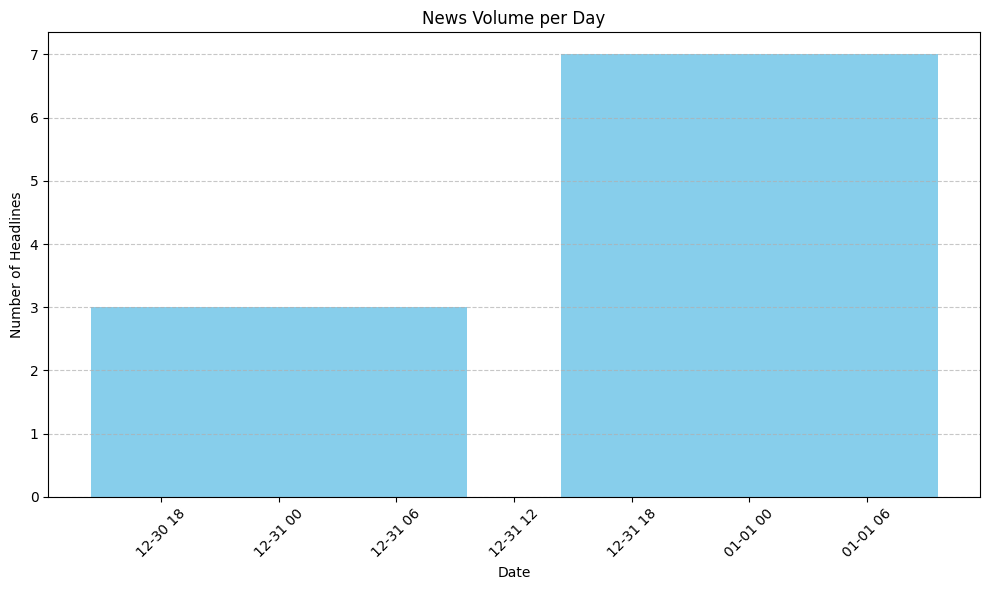

In [31]:
import matplotlib.pyplot as plt

# Create a bar plot for news volume per day
plt.figure(figsize=(10, 6))
plt.bar(news_volume_per_day['date'], news_volume_per_day['headline_count'], color='skyblue')
plt.title('News Volume per Day')
plt.xlabel('Date')
plt.ylabel('Number of Headlines')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()